,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12,Cumulative Oil Production (Year 1)
74,Brisket 1-204H,35023133,0.107214,1.6,240.0,247.0,241.0,214.0,187.0,164.0,...,43.0,70.0,93.0,92.0,98.0,95.0,137.0,144.0,192.0,2076.0
33,Brisket 1-44H,36087449,0.072103,1.6,35.0,60.0,67.0,38.0,58.0,46.0,...,7.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,602.0
73,Brisket 10-65H,36199370,0.097415,1.6,506.0,483.0,468.0,430.0,372.0,369.0,...,112.0,170.0,173.0,255.0,255.0,292.0,331.0,349.0,405.0,3994.0
87,Brisket 2-149H,31397763,0.085264,1.6,113.0,143.0,138.0,119.0,93.0,100.0,...,20.0,46.0,39.0,70.0,35.0,68.0,44.0,69.0,83.0,1171.0
77,Brisket 3-212H,30569755,0.079498,1.6,49.0,68.0,58.0,50.0,57.0,44.0,...,1.0,0.0,7.0,0.0,4.0,24.0,0.0,12.0,33.0,567.0


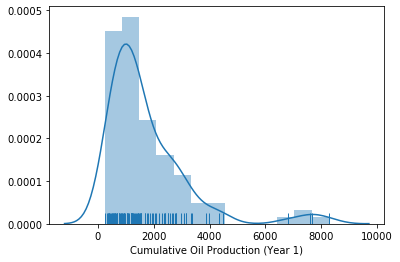

In [399]:
# Importing everything
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from  math import sqrt, e, pi
import glob
from mpl_toolkits import mplot3d
import pandas.plotting as pd_plot
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing  import StandardScaler 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import scale
from sklearn.linear_model import LassoCV
import random
# Reading in files
WP = pd.read_csv('well production.csv')
WP['Cumulative Oil Production (Year 1)'] = WP.iloc[:,4:16].sum(axis=1)
WP= WP.sort_values('well name')
sns.distplot(WP['Cumulative Oil Production (Year 1)'], rug = True)
#WP["Effective Decline Rate Fraction"] = ((WP['oil 1']/30) - (WP['oil 2']/30))/(WP['oil 1']/30)
#WP["Initial Production Rate (BOPD)"] = WP["oil 1"]/30
#WP["Nominal Decline Rate Fraction"] = -np.log((1-WP["Effective Decline Rate Fraction"]))
#WP["Life of the well (Years)"] = (1/WP["Nominal Decline Rate Fraction"])*np.log((WP["Initial Production Rate (BOPD)"]/20))
#WP["Final Production Rate (BOPD)"] = WP["Initial Production Rate (BOPD)"]*(e**(-WP["Nominal Decline Rate Fraction"]*WP["Life of the well (Years)"]))
#WP["cumulative Production (bbl)"] = (WP['Initial Production Rate (BOPD)']-WP["Initial Production Rate (BOPD)"]*(e**(-WP["Nominal Decline Rate Fraction"]*WP["Life of the well (Years)"])))/(WP['Nominal Decline Rate Fraction'])
WP.head()




In [29]:
# Reading in more data files
csv_files = glob.glob('Well Data/*.csv')
Peak6 = pd.read_csv('Well Data/Peak 6-217H.csv')
li = []
FN = []
TP = []
MPR = []
MPO = []
MPE = []
MP = []
MPOi = []
MT = []
ME = []
N = []
WS =[]
a = []
MYM = []
BE = []
EE = []

# Making one dataframe for all well logs
for files in csv_files:
    file = pd.read_csv(files)
    li.append(file.easting.max()-file.easting.min())
    FN.append(file['proppant weight (lbs)'].count())
    TP.append(file['proppant weight (lbs)'].sum())
    MP.append(file['proppant weight (lbs)'].mean())
    MPR.append(file['pump rate (cubic feet/min)'].mean())
    MPO.append(file['porosity'].mean())
    MPE.append(file['permeability'].mean())
    MPOi.append(file["Poisson's ratio"].mean())
    MT.append(file["thickness (ft)"].mean())
    N.append(file["northing"].mean())
    ME.append((file["easting"].max()+file['easting'].min())/2)
    BE.append(file["easting"].min())
    EE.append(file['easting'].max())
    WS.append(file['water saturation'].mean())
    MYM.append(file["Young's Modulus"].mean())
    a.append(file)
    
WP['Well Length'] = li
WP['Number of frac stages'] = FN
WP['Total Proppant weight (lbs)'] = TP
WP['Average Proppant weight (lbs) per stage'] = MP
WP['Average Proppant volume (cf) per stage'] = (WP["Average Proppant weight (lbs) per stage"]/156.07)*.3
WP['Average pump rate (cubic feet/min)'] = MPR
WP['Average Porosity'] = MPO
WP['Average Permeability'] = MPE
WP["Average Poisson's ratio"] = MPOi
WP['Average Thickness (ft)'] = MT
WP['Northing'] = N
WP["Beginning Easting value"] = BE
WP['Middle Easting value'] = ME
WP['Ending Easting value'] = EE
WP['Average Water Saturation'] = WS
WP["Average Young's Modulus"] = MYM
WP['Frac Length (ft)'] = WP["Average Proppant volume (cf) per stage"]/(WP["Average Thickness (ft)"]*(1/12))
WP["Area of the reservoir (Acres)"] = (WP["Well Length"]*WP["Frac Length (ft)"] + pi*WP['Frac Length (ft)']**2)/43560
WP.head()

,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,Average Poisson's ratio,Average Thickness (ft),Northing,Beginning Easting value,Middle Easting value,Ending Easting value,Average Water Saturation,Average Young's Modulus,Frac Length (ft),Area of the reservoir (Acres)
74,Brisket 1-204H,35023133,0.107214,1.6,240.0,247.0,241.0,214.0,187.0,164.0,...,0.30400,40.849003,33900.0,86600.0,88868.0,91136.0,0.062545,1.062235e+07,403.576708,53.771997
33,Brisket 1-44H,36087449,0.072103,1.6,35.0,60.0,67.0,38.0,58.0,46.0,...,0.36054,5.000000,3900.0,1900.0,6117.5,10335.0,0.221377,4.556389e+06,3679.199433,1688.710808
73,Brisket 10-65H,36199370,0.097415,1.6,506.0,483.0,468.0,430.0,372.0,369.0,...,0.31912,58.052313,14400.0,80100.0,83103.0,86106.0,0.065860,8.361116e+06,335.248026,54.329365
87,Brisket 2-149H,31397763,0.085264,1.6,113.0,143.0,138.0,119.0,93.0,100.0,...,0.29749,28.468096,62100.0,82600.0,85911.0,89222.0,0.190072,9.908358e+06,698.949716,141.487821
77,Brisket 3-212H,30569755,0.079498,1.6,49.0,68.0,58.0,50.0,57.0,44.0,...,0.32134,82.059431,43000.0,17700.0,21815.0,25930.0,0.047795,1.219924e+07,185.622060,37.555438


In [32]:
# Calculating OOIP and Recoverable Reserves and making a new column for both of them
WP['Original Oil in Place'] = (7758*WP["Area of the reservoir (Acres)"]*WP['Average Thickness (ft)']*WP['Average Porosity']*(1-WP['Average Water Saturation']))/WP['formation volume factor']
WP['Recoverable Reserves'] = WP['Original Oil in Place']*WP['recovery factor']

In [362]:
Peak6.describe()
#sns.distplot(Peak6[""], rug = True)
#Peak6.permeability.describe()
#sns.distplot(Peak6.permeability, rug = True)

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,thickness (ft),proppant weight (lbs),pump rate (cubic feet/min)
count,100.000000,100.0,100.000000,100.00000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,100.000000
mean,81782.320000,1600.0,0.078500,0.02697,0.326620,6.277894e+06,0.081318,0.918682,27.492502,9.104229e+05,294.800448
std,2216.793798,0.0,0.013056,0.00999,0.003247,5.099620e+05,0.002052,0.002052,2.630183,4.516506e+05,51.187286
min,78000.000000,1600.0,0.040000,0.00700,0.321000,5.434035e+06,0.077797,0.914925,22.559422,1.862969e+04,179.223099
25%,79891.000000,1600.0,0.070000,0.01900,0.324000,5.832089e+06,0.079584,0.916989,25.279912,5.959234e+05,249.420366
50%,81782.500000,1600.0,0.080000,0.02600,0.327000,6.261940e+06,0.081276,0.918724,27.714355,8.342663e+05,296.918498
75%,83673.250000,1600.0,0.090000,0.03325,0.329000,6.721564e+06,0.083011,0.920416,29.845370,1.151494e+06,330.492695
max,85565.000000,1600.0,0.100000,0.05200,0.332000,7.162186e+06,0.085075,0.922203,31.432591,2.586512e+06,405.669215


In [363]:
# Verifying dataframe integrity
WP['Recoverable Reserves'].values

array([ 65405.12263041, 130323.20972997, 112164.52537811,  61231.90126252,
        42191.43810975,  23670.14864193,  98338.07991078, 111179.65202515,
        56624.3593585 ,  72064.93045281,  63001.60244012, 123571.8535069 ,
        48155.77956426,  84224.14337255,  23814.26876442, 174045.52070256,
        54169.38122283, 200212.6165624 , 141440.20245897, 118314.38621788,
        71620.81544727, 208911.24278704,  73194.89497357,  88476.55408099,
        18211.8072544 , 205016.08590282,  60817.35310626, 126154.95576165,
        87858.78343012,  41839.36387761, 142134.10442998, 102811.59574698,
        77507.38188825, 361058.30465107,  50218.30165493,  92834.77674909,
        84692.91284307,  53893.43604342,  64333.47910394,  34876.27650108,
        29498.33412064, 292984.29610371,  25807.66896746,  95059.31523037,
        35164.13408794,  85630.04242869,  61539.43764093,  37995.38868566,
        65653.8728901 , 107921.47874365,  57368.05387659,  96690.77416647,
        97633.8826948 ,  

In [364]:
WP.columns

Index(['well name', 'average pressure (Pa)', 'recovery factor',
       'formation volume factor', 'oil 1', 'oil 2', 'oil 3', 'oil 4', 'oil 5',
       'oil 6', 'oil 7', 'oil 8', 'oil 9', 'oil 10', 'oil 11', 'oil 12',
       'water 1', 'water 2', 'water 3', 'water 4', 'water 5', 'water 6',
       'water 7', 'water 8', 'water 9', 'water 10', 'water 11', 'water 12',
       'Cumulative Oil Production (Year 1)', 'Well Length',
       'Number of frac stages', 'Total Proppant weight (lbs)',
       'Average Proppant weight (lbs) per stage',
       'Average Proppant volume (cf) per stage',
       'Average pump rate (cubic feet/min)', 'Average Porosity',
       'Average Permeability', 'Average Poisson's ratio',
       'Average Thickness (ft)', 'Northing', 'Beginning Easting value',
       'Middle Easting value', 'Ending Easting value',
       'Average Water Saturation', 'Average Young's Modulus',
       'Frac Length (ft)', 'Area of the reservoir (Acres)',
       'Original Oil in Place', 'Recovera

In [365]:
WP.head()

,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,Northing,Beginning Easting value,Middle Easting value,Ending Easting value,Average Water Saturation,Average Young's Modulus,Frac Length (ft),Area of the reservoir (Acres),Original Oil in Place,Recoverable Reserves
74,Brisket 1-204H,35023133,0.107214,1.6,240.0,247.0,241.0,214.0,187.0,164.0,...,33900.0,86600.0,88868.0,91136.0,0.062545,1.062235e+07,403.576708,53.771997,6.100408e+05,65405.122630
33,Brisket 1-44H,36087449,0.072103,1.6,35.0,60.0,67.0,38.0,58.0,46.0,...,3900.0,1900.0,6117.5,10335.0,0.221377,4.556389e+06,3679.199433,1688.710808,1.807446e+06,130323.209730
73,Brisket 10-65H,36199370,0.097415,1.6,506.0,483.0,468.0,430.0,372.0,369.0,...,14400.0,80100.0,83103.0,86106.0,0.065860,8.361116e+06,335.248026,54.329365,1.151413e+06,112164.525378
87,Brisket 2-149H,31397763,0.085264,1.6,113.0,143.0,138.0,119.0,93.0,100.0,...,62100.0,82600.0,85911.0,89222.0,0.190072,9.908358e+06,698.949716,141.487821,7.181408e+05,61231.901263
77,Brisket 3-212H,30569755,0.079498,1.6,49.0,68.0,58.0,50.0,57.0,44.0,...,43000.0,17700.0,21815.0,25930.0,0.047795,1.219924e+07,185.622060,37.555438,5.307262e+05,42191.438110


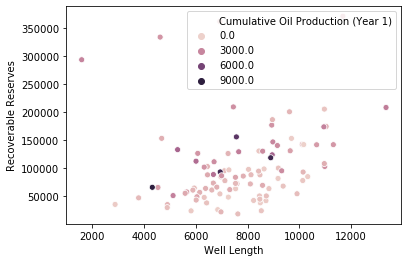

In [366]:
# Mapping Well Length and Recoverable Reserves to Cumulative Oil Production; trying to find a correlation
sns.scatterplot(WP['Well Length'], WP['Recoverable Reserves'], hue = WP["Cumulative Oil Production (Year 1)"])

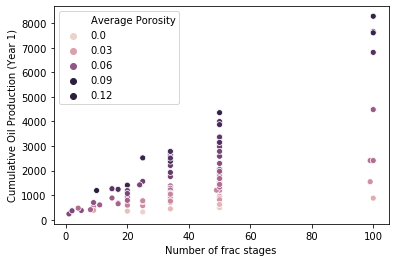

In [367]:
# Mapping frac stages to porosity and Cumulative Oil Production
sns.scatterplot(WP['Number of frac stages'], WP["Cumulative Oil Production (Year 1)"],hue=WP['Average Porosity'])


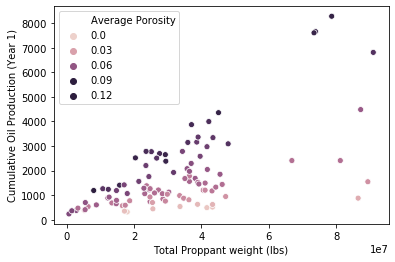

In [368]:
# Mapping Total Proppant Weight and COP to Average Porosity
sns.scatterplot(WP['Total Proppant weight (lbs)'], WP['Cumulative Oil Production (Year 1)'], hue=WP["Average Porosity"])

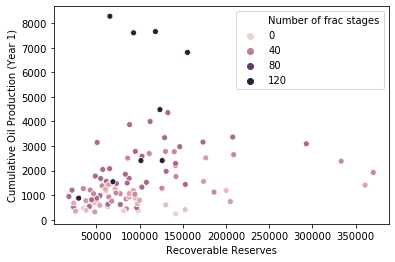

In [369]:
# Mapping Recoverable Reserves to COP and # of Frac Stages
sns.scatterplot(WP['Recoverable Reserves'], WP['Cumulative Oil Production (Year 1)'], hue = WP["Number of frac stages"])

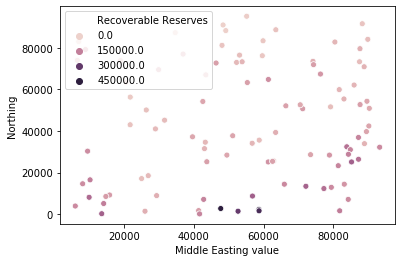

In [39]:
#Mapping Recoverable Reserves
sns.scatterplot(WP['Middle Easting value'], WP["Northing"], hue = WP['Recoverable Reserves'])

Text(0.5, 1.0, 'Porosity values')

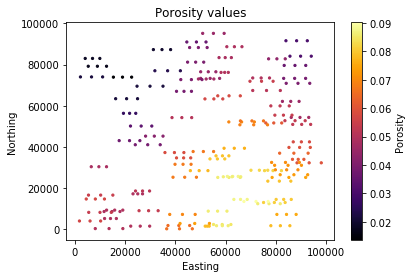

In [38]:
# Looking for regions with high porosity
plt.scatter(WP['Middle Easting value'], WP['Northing'], s =5, c = WP['Average Porosity'], cmap = 'inferno')
plt.scatter(WP['Beginning Easting value'], WP['Northing'], s =5, c = WP["Average Porosity"], cmap = 'inferno')
plt.scatter(WP['Ending Easting value'], WP['Northing'], c = WP['Average Porosity'], cmap = 'inferno', s = 5)
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.colorbar(label = "Porosity")
plt.title("Porosity values")

Text(0.5, 1.0, 'Porosity values')

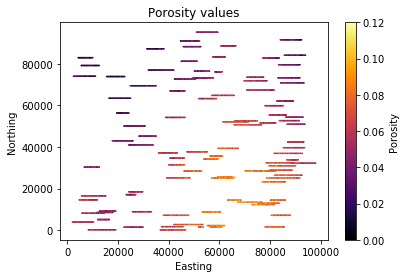

In [371]:
# Ditto
frame = pd.concat(a, axis=0, ignore_index=True, sort = False)
frame.head()
fig = plt.scatter(frame.easting.dropna(), frame.northing.dropna(),s = 0.1, c = frame.porosity.dropna(), cmap = 'inferno')
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.colorbar(label = "Porosity")
plt.title("Porosity values")

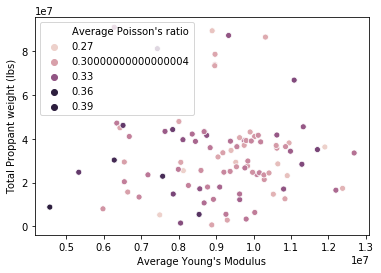

In [372]:
# Trying to find where Young's Modulus fits into all of this
sns.scatterplot(WP["Average Young's Modulus"], WP['Total Proppant weight (lbs)'], hue = WP["Average Poisson's ratio"])

In [374]:
frame.head()
CWP = pd.read_csv("cleaned well production.csv")

In [375]:
#num = CWP._get_numeric_data()                         # get the numerical values
#num[num < 0] = 0                                          # truncate negative values to 0.0
CWP.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
average pressure (Pa),100.0,3.642464e+07,4.005144e+06,2.894408e+07,3.352784e+07,3.607448e+07,3.910962e+07,4.725545e+07
recovery factor,100.0,9.490102e-02,1.690229e-02,2.692023e-02,8.608660e-02,9.611932e-02,1.048920e-01,1.397814e-01
formation volume factor,100.0,1.600000e+00,3.124285e-15,1.600000e+00,1.600000e+00,1.600000e+00,1.600000e+00,1.600000e+00
Cumulative Oil Production (Year 1),100.0,1.754670e+03,1.537476e+03,2.350000e+02,7.835000e+02,1.261000e+03,2.312500e+03,8.279000e+03
Cumulative Water Production (Year 1),100.0,1.033110e+03,1.385984e+03,0.000000e+00,1.885000e+02,6.155000e+02,1.392750e+03,7.488000e+03
Well Length,100.0,7.706730e+03,2.006711e+03,1.590000e+03,6.437500e+03,7.549000e+03,8.950000e+03,1.334400e+04
Number of frac stages,100.0,4.076000e+01,2.359726e+01,1.000000e+00,2.500000e+01,3.400000e+01,5.000000e+01,1.000000e+02
Total Proppant weight (lbs),100.0,3.234447e+07,1.965780e+07,6.215235e+05,1.849306e+07,2.963106e+07,4.066705e+07,9.104229e+07
Average Proppant weight (lbs) per stage,100.0,7.808867e+05,8.655865e+04,5.651418e+05,7.195992e+05,7.817039e+05,8.557790e+05,9.888608e+05
Average pump rate (cubic feet/min),100.0,3.008558e+02,9.453838e+00,2.530798e+02,2.975284e+02,3.016955e+02,3.059463e+02,3.224918e+02


In [20]:
# Finding correlations between all variables
corr_matrix = np.corrcoef(CWP.drop("well name", axis = 1), rowvar = False)
print(np.around(corr_matrix,2))                           # print the correlation matrix to 2 decimals

[[ 1.   -0.32  0.    0.11  0.11 -0.17 -0.1  -0.09  0.01 -0.02  0.08  0.06
   0.21  0.36  0.28 -0.01 -0.06]
 [-0.32  1.   -0.    0.14  0.12  0.08 -0.   -0.02 -0.15 -0.13  0.24  0.28
  -0.26 -0.23 -0.37  0.13 -0.1 ]
 [ 0.   -0.    1.   -0.    0.    0.    0.   -0.   -0.   -0.   -0.    0.
   0.    0.    0.    0.    0.  ]
 [ 0.11  0.14 -0.    1.    0.97 -0.09  0.66  0.63  0.14  0.05  0.63  0.67
  -0.09  0.31 -0.38  0.28  0.05]
 [ 0.11  0.12  0.    0.97  1.   -0.12  0.62  0.59  0.12  0.03  0.61  0.66
  -0.09  0.33 -0.38  0.21  0.19]
 [-0.17  0.08  0.   -0.09 -0.12  1.   -0.15 -0.16 -0.14 -0.03  0.02  0.02
  -0.02 -0.08 -0.04  0.15 -0.06]
 [-0.1  -0.    0.    0.66  0.62 -0.15  1.    0.98  0.25  0.    0.01  0.05
  -0.03  0.08 -0.04 -0.01 -0.11]
 [-0.09 -0.02 -0.    0.63  0.59 -0.16  0.98  1.    0.4   0.    0.01  0.04
  -0.01  0.05 -0.04 -0.01 -0.1 ]
 [ 0.01 -0.15 -0.    0.14  0.12 -0.14  0.25  0.4   1.    0.12  0.01  0.03
   0.15 -0.13 -0.06 -0.07  0.05]
 [-0.02 -0.13 -0.    0.05  0.03 -0.03  

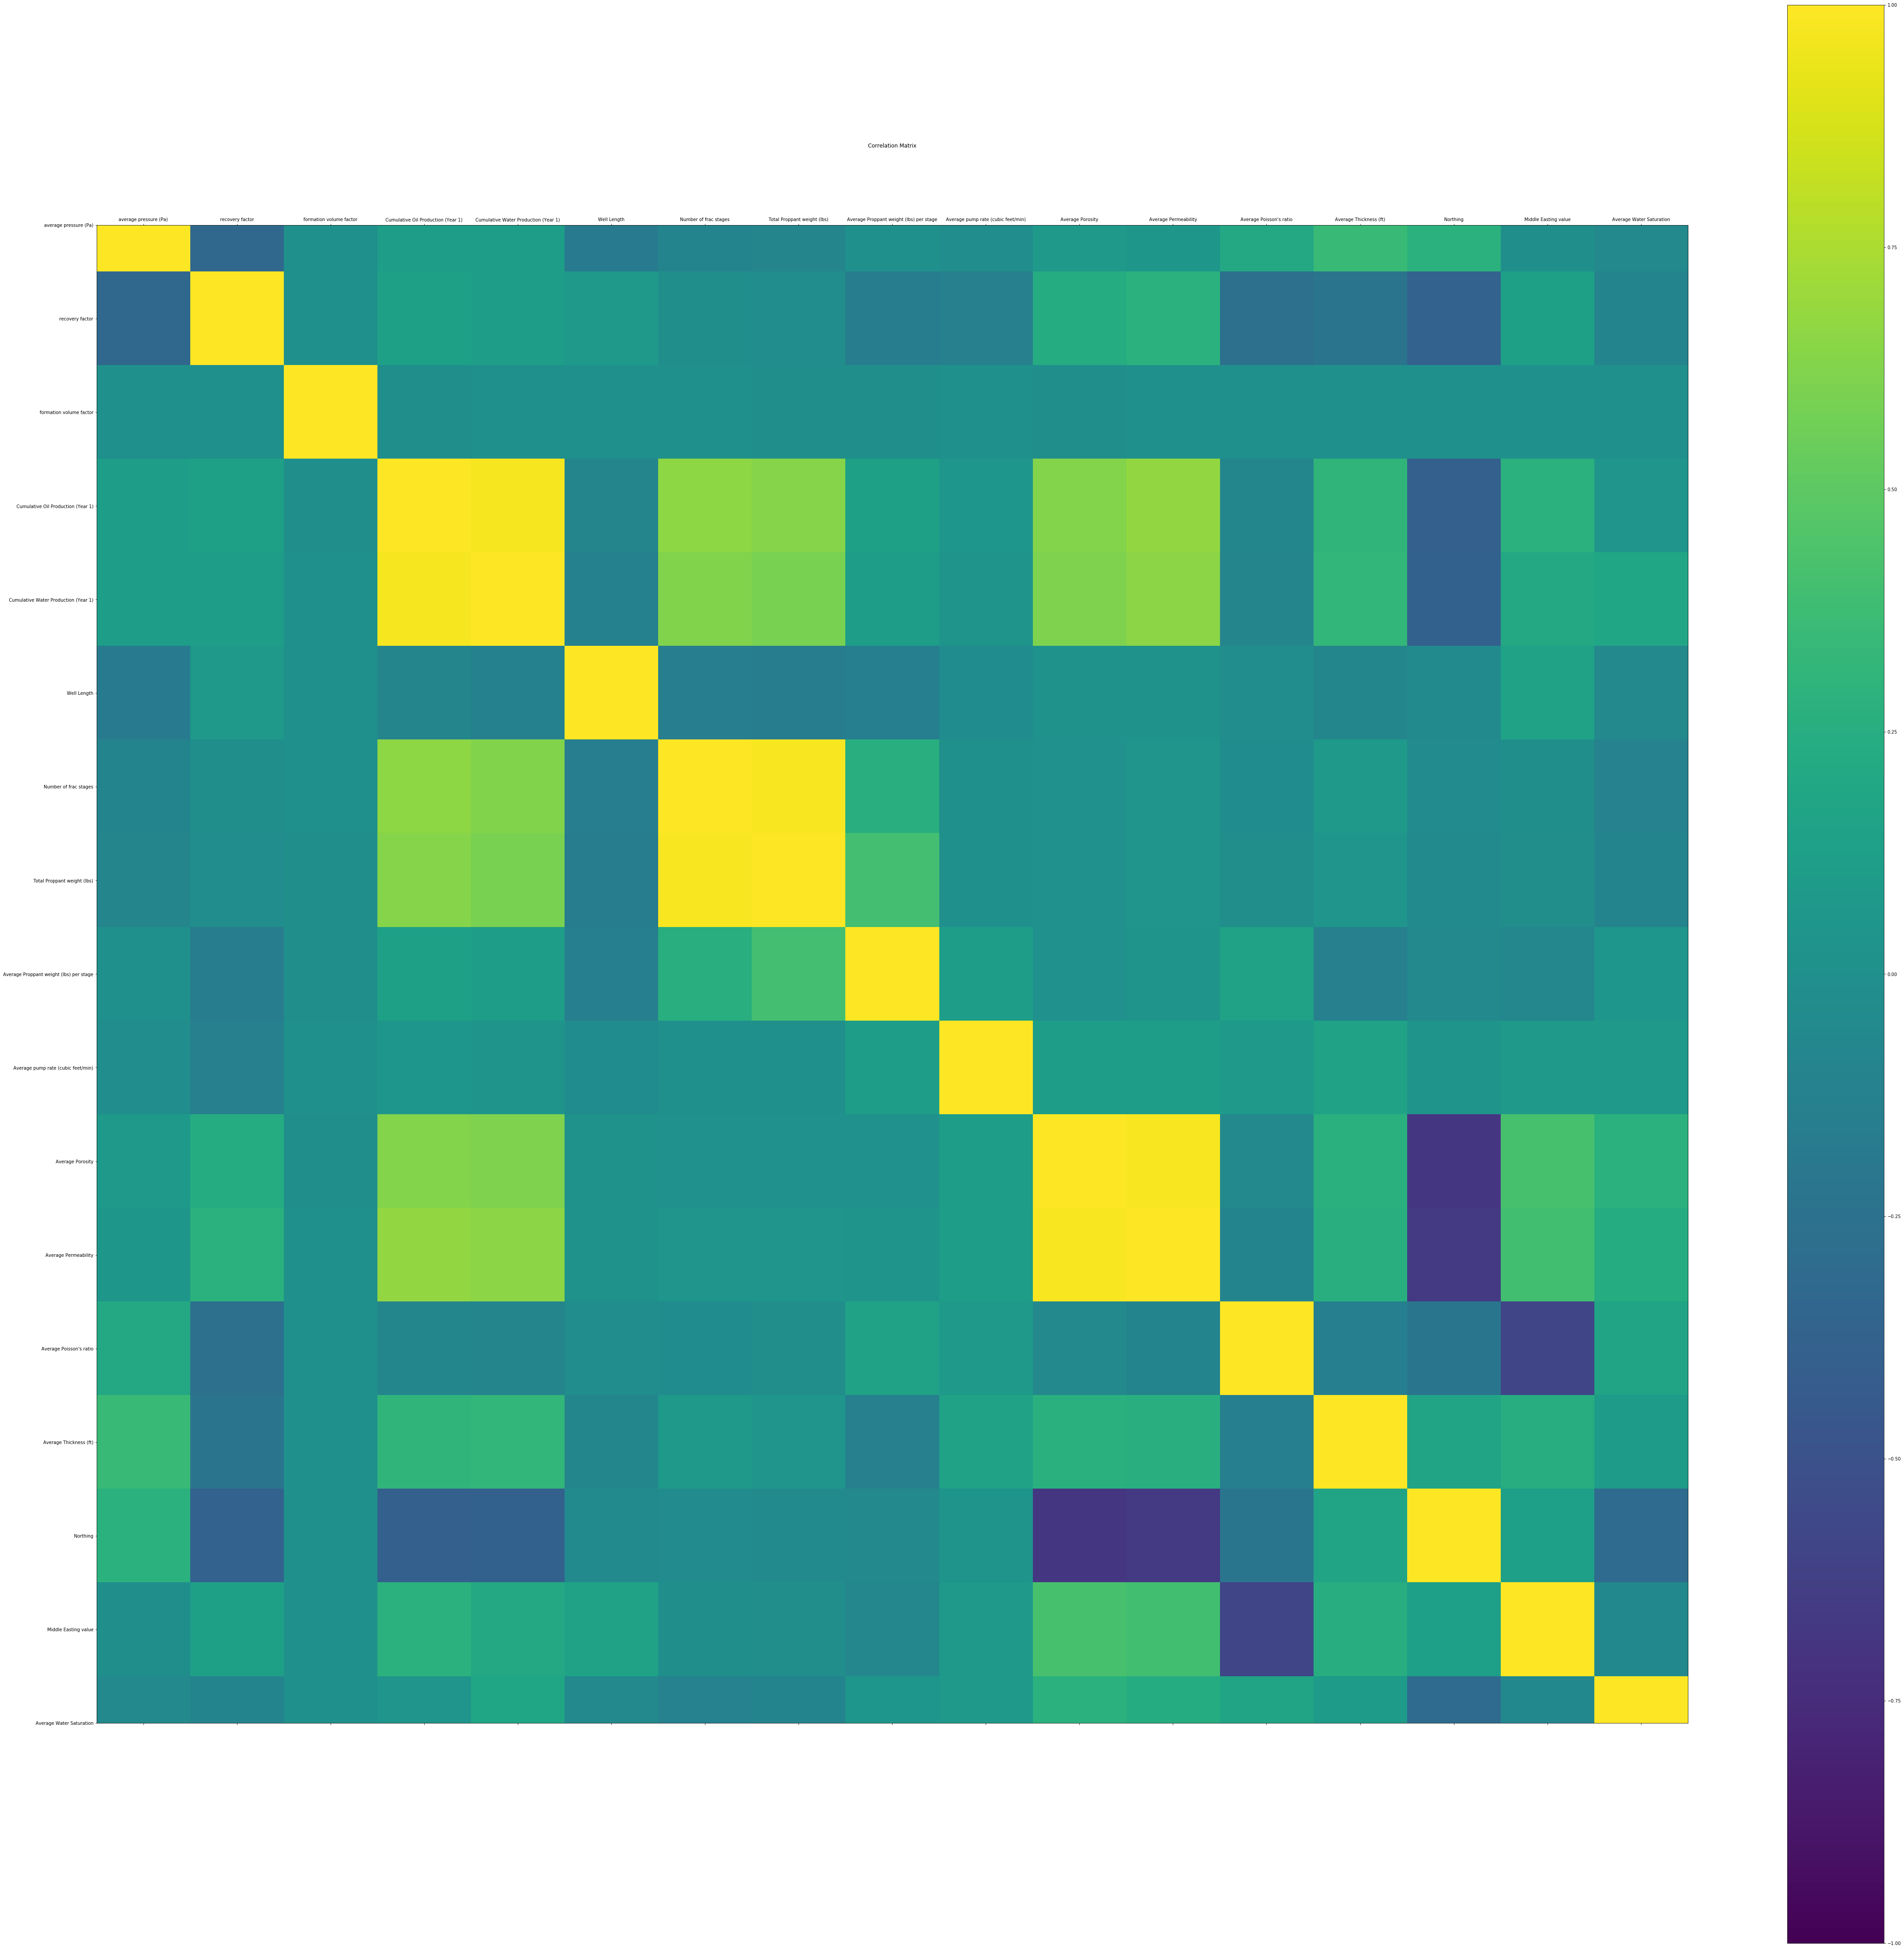

In [21]:
# Plotting found correlations by color
def plot_corr(dataframe,size=10):                         # plots a graphical correlation matrix 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')

plot_corr(CWP.drop("well name", axis=1),80)                                      # using our correlation matrix visualization function
plt.show()

C:\Users\jv204\Anaconda3\envs\energyanalytics\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 1.6 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\jv204\Anaconda3\envs\energyanalytics\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.6 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\jv204\Anaconda3\envs\energyanalytics\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 1.6 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


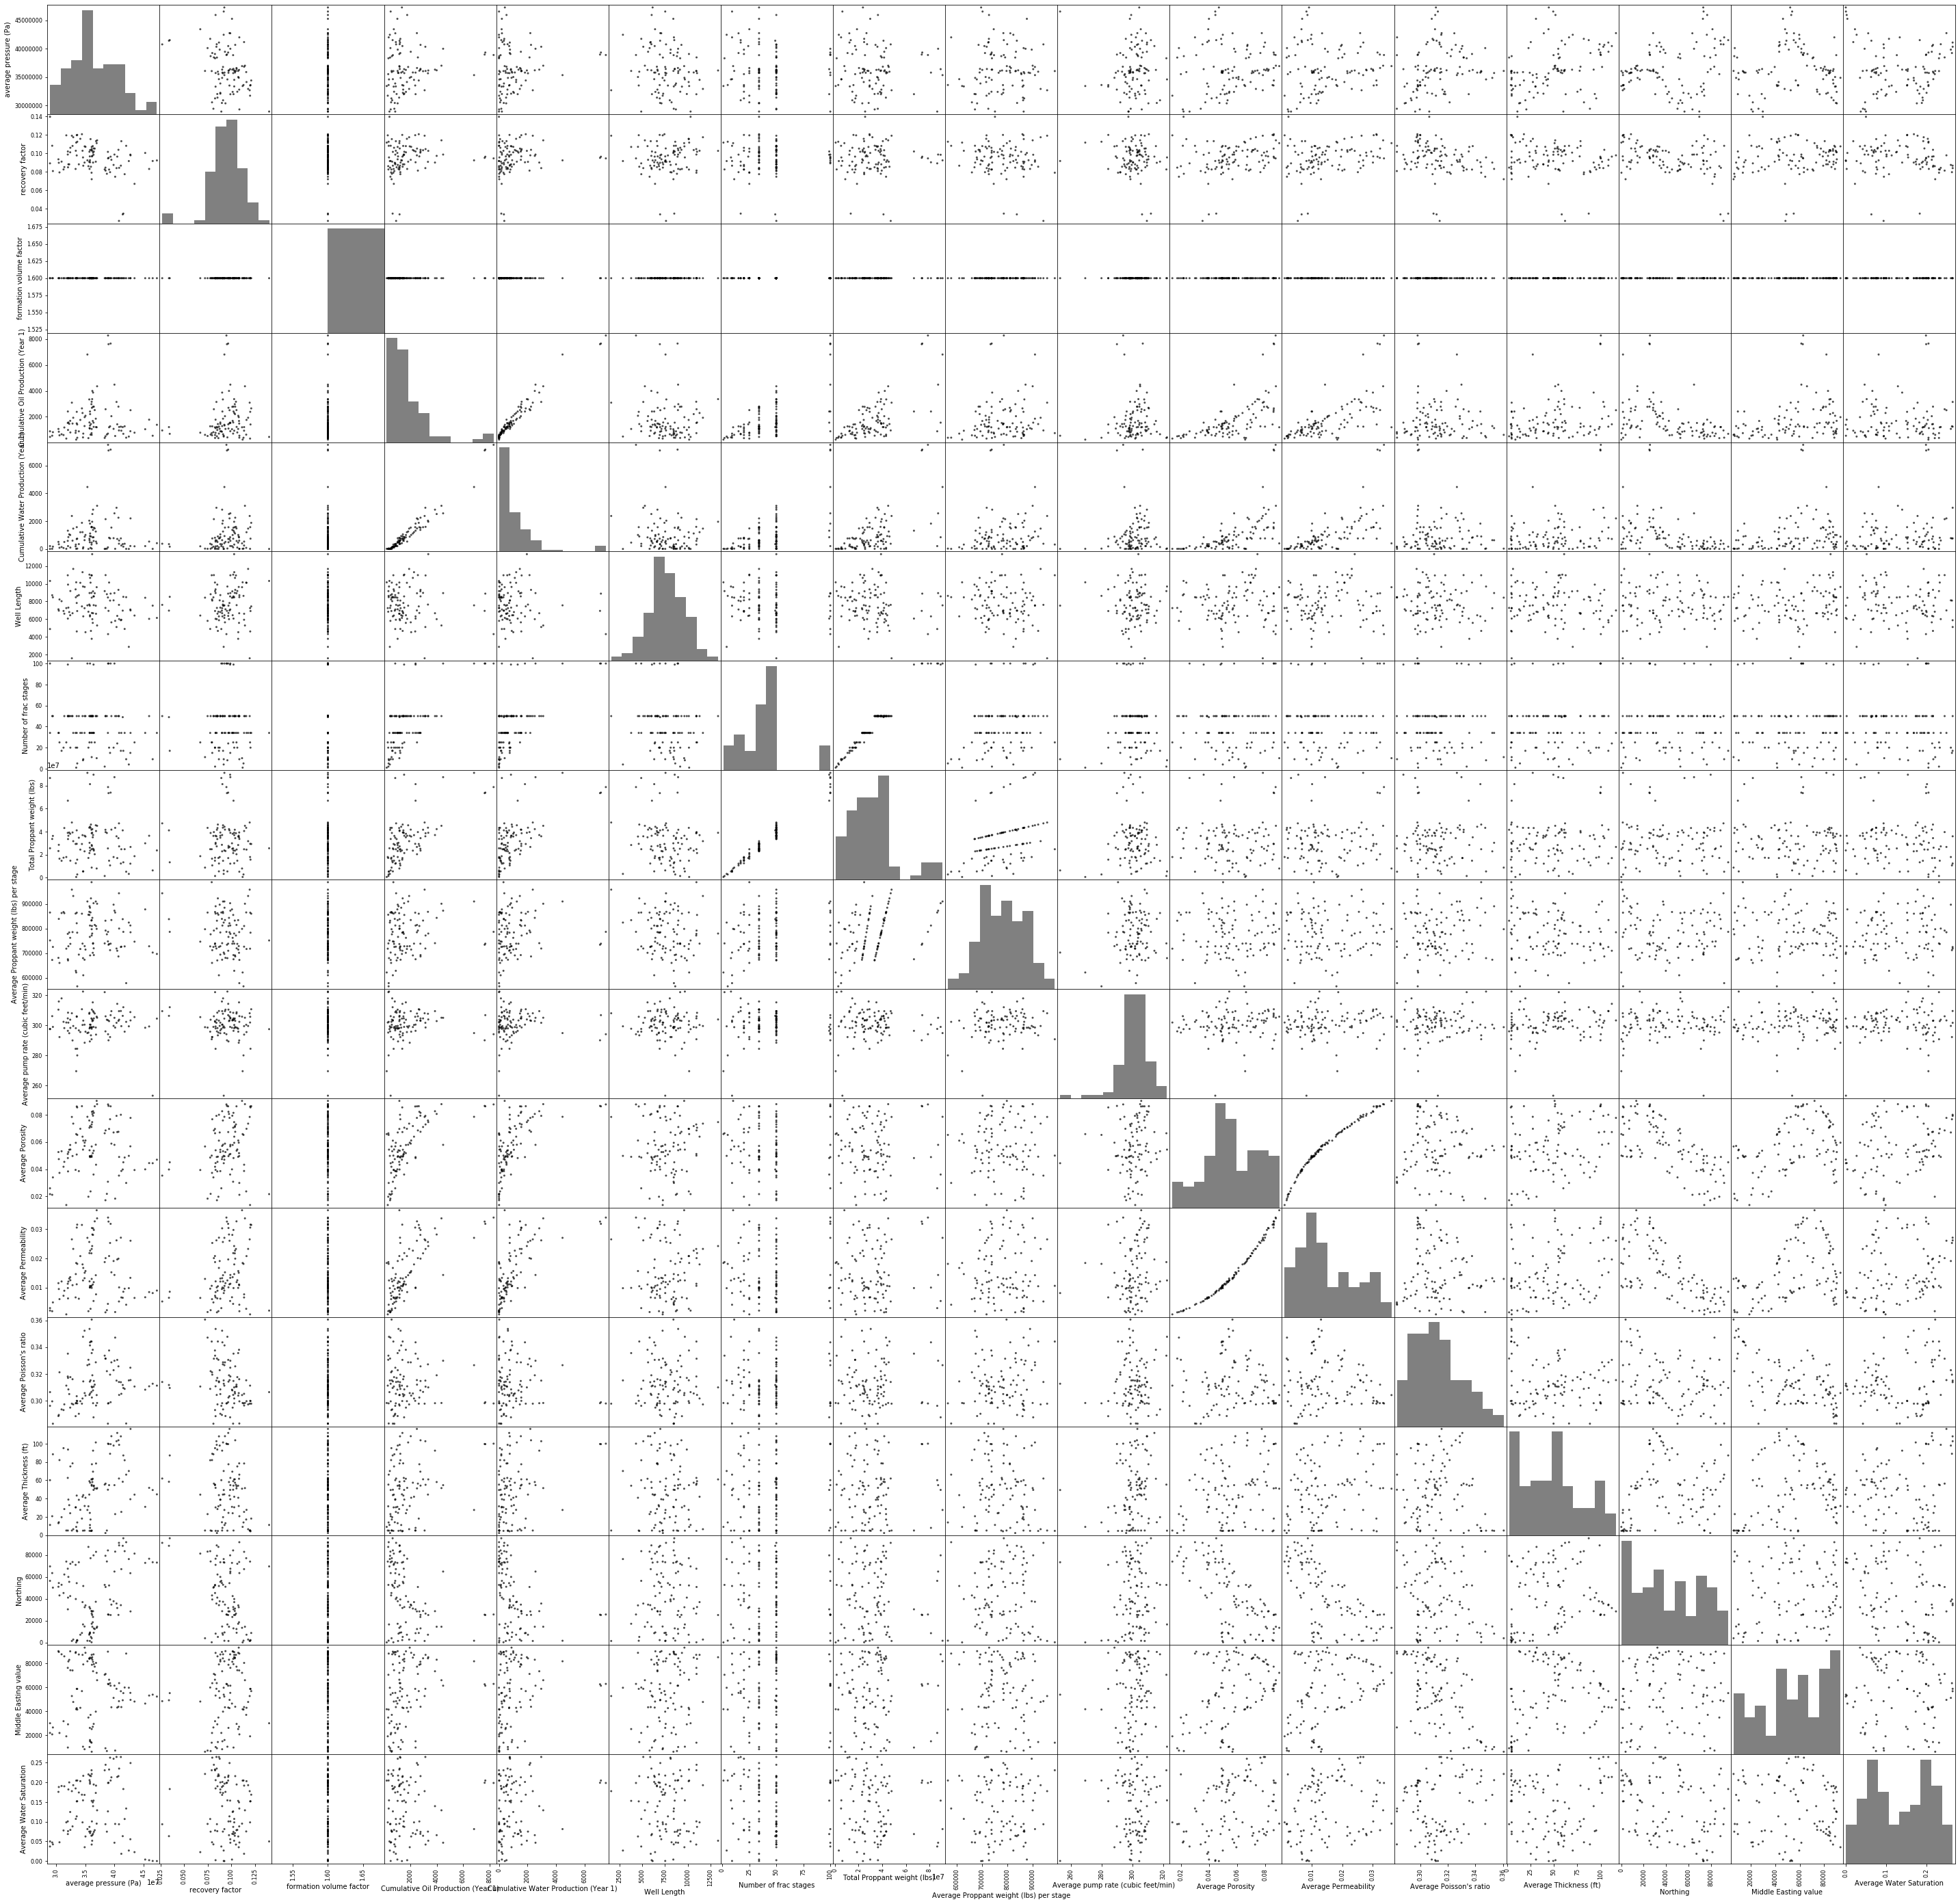

In [22]:
# Plotting found correlations
pd_plot.scatter_matrix(CWP.drop('well name', axis=1), alpha = 0.7,              # pandas matrix scatter plot
    figsize=(50, 50),color = 'black', hist_kwds={'color':['grey']})
plt.show()

In [391]:
CWP.describe()

,average pressure (Pa),recovery factor,formation volume factor,Cumulative Oil Production (Year 1),Cumulative Water Production (Year 1),Well Length,Number of frac stages,Total Proppant weight (lbs),Average Proppant weight (lbs) per stage,Average pump rate (cubic feet/min),Average Porosity,Average Permeability,Average Poisson's ratio,Average Thickness (ft),Northing,Middle Easting value,Average Water Saturation
count,1.000000e+02,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.642464e+07,0.094901,1.600000e+00,1754.670000,1033.110000,7706.730000,40.760000,3.234447e+07,780886.746824,300.855765,0.056286,0.015181,0.313039,48.733259,42618.000000,55386.365000,0.134966
std,4.005144e+06,0.016902,3.124285e-15,1537.476182,1385.983878,2006.710927,23.597261,1.965780e+07,86558.647596,9.453838,0.019148,0.009337,0.017091,32.193543,28206.229629,26196.690455,0.073488
min,2.894408e+07,0.026920,1.600000e+00,235.000000,0.000000,1590.000000,1.000000,6.215235e+05,565141.794702,253.079825,0.013700,0.000900,0.283110,2.231946,100.000000,6117.500000,0.000000
25%,3.352784e+07,0.086087,1.600000e+00,783.500000,188.500000,6437.500000,25.000000,1.849306e+07,719599.151349,297.528404,0.044475,0.008405,0.299570,22.372536,16950.000000,36403.750000,0.074616
50%,3.607448e+07,0.096119,1.600000e+00,1261.000000,615.500000,7549.000000,34.000000,2.963106e+07,781703.934007,301.695470,0.054350,0.012490,0.310710,49.521349,38500.000000,57742.750000,0.136577
75%,3.910962e+07,0.104892,1.600000e+00,2312.500000,1392.750000,8950.000000,50.000000,4.066705e+07,855778.950489,305.946285,0.071175,0.021980,0.323362,69.574932,69850.000000,80649.125000,0.199249
max,4.725545e+07,0.139781,1.600000e+00,8279.000000,7488.000000,13344.000000,100.000000,9.104229e+07,988860.773545,322.491819,0.090200,0.036380,0.360540,116.169177,95200.000000,93221.500000,0.264625


Train score: 0.8312477012579615
Test score: 0.8077005875244844
Number of coefficients used: 6
Root mean squared error: 798.5263480273061
[ 2.87596560e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.39209447e+01  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  4.20103402e+02  7.83260205e+04 -0.00000000e+00  9.69020126e-01
  0.00000000e+00  1.21902729e-03 -0.00000000e+00]


average pressure (Pa)                          0.000029
recovery factor                                0.000000
formation volume factor                        0.000000
Well Length                                    0.000000
Number of frac stages                         33.920945
Total Proppant weight (lbs)                    0.000000
Average Proppant weight (lbs) per stage       -0.000000
Average pump rate (cubic feet/min)             0.000000
Average Porosity                             420.103402
Average Permeability                       78326.020464
Average Poisson's ratio                       -0.000000
Average Thickness (ft)                         0.969020
Northing                                       0.000000
Middle Easting value                           0.001219
Average Water Saturation                      -0.000000
dtype: float64

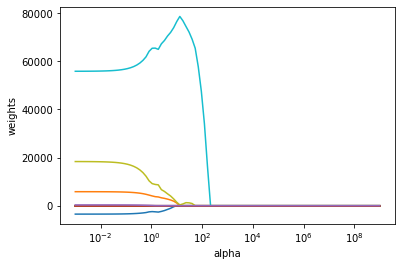

In [26]:
# Using Lasso Regression to optimize cumulative oil production
CWP1 = CWP.drop(['well name', 'Cumulative Water Production (Year 1)'], axis = 1)
X = CWP1.drop('Cumulative Oil Production (Year 1)', axis = 1)
scaler = StandardScaler()
sX = scaler.fit_transform(X)
y = CWP1['Cumulative Oil Production (Year 1)']
sy = scaler.fit_transform(y.values.reshape((-1,1)))
alphas = 10**np.linspace(10,-2,100)*.05
coefs = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state = 0)
Lasso = linear_model.Lasso(max_iter = 300000, tol = 0.0001, normalize = True)
for a in alphas:
    Lasso.set_params(alpha = a)
    Lasso.fit(X_train, y_train)
    coefs.append(Lasso.coef_)
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Lassocv = LassoCV(alphas = None, cv = 20, max_iter = 300000, normalize = True)
Lassocv.fit(X_train, y_train)

Lasso.set_params(alpha = Lassocv.alpha_)
Lasso.fit(X_train, y_train)

y_pred = Lasso.predict(X_test)
rmse = sqrt(metrics.mean_squared_error(y_test,y_pred))

print("Train score:", Lasso.score(X_train, y_train))
print("Test score:", Lasso.score(X_test, y_test))
print("Number of coefficients used:", np.sum(Lasso.coef_!=0))
print("Root mean squared error:", rmse)
print(Lasso.coef_)
pd.Series(Lasso.coef_, index = X.columns)


recovery factor                             5792.205789
formation volume factor                        7.891296
Well Length                                    0.010327
Number of frac stages                         23.662814
Total Proppant weight (lbs)                    0.000022
Average Proppant weight (lbs) per stage       -0.000240
Average pump rate (cubic feet/min)            -9.121471
Average Porosity                           46311.466061
Average Thickness (ft)                         4.753428
Northing                                       0.005020
Middle Easting value                           0.001552
Average Water Saturation                      66.712653
dtype: float64
Train score: 0.8429472140914416
Test score: 0.7620902920791222
Mean squared error: 737.5927612602159


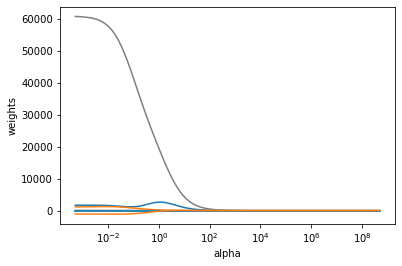

In [23]:
# Tried Ridge Regression too. Worked better than Lasso, so we'll use that.
X1 = CWP.drop(["well name", "average pressure (Pa)", "Cumulative Water Production (Year 1)", "Average Permeability", "Average Poisson's ratio"], axis = 1)
#Preprocessing
X2 = X1.drop(["Cumulative Oil Production (Year 1)"], axis = 1)
y1 = X1["Cumulative Oil Production (Year 1)"]
alphas = 10**np.linspace(10,-2, 100)*.05
coefs =[]
ridge = Ridge(normalize = True)
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X2, y1)
    coefs.append(ridge.coef_)
np.shape(coefs)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
X2_train, X2_test, y1_train, y1_test = train_test_split(X2, y1, test_size = 0.3, random_state = 0)
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X2_train, y1_train)
ridgecv.alpha_
ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X2_train, y1_train)
y1_pred = ridge.predict(X2_test)
print(pd.Series(ridge.coef_, index = X2.columns))
print("Train score:", ridge.score(X2_train, y1_train))
print("Test score:", ridge.score(X2_test, y1_test))
print("Mean squared error:", sqrt(metrics.mean_squared_error(y1_test, y1_pred)))




In [43]:
X2

,recovery factor,formation volume factor,Well Length,Number of frac stages,Total Proppant weight (lbs),Average Proppant weight (lbs) per stage,Average pump rate (cubic feet/min),Average Porosity,Average Thickness (ft),Northing,Middle Easting value,Average Water Saturation
0,0.107214,1.6,4536.0,50,3.573506e+07,714701.157397,295.729046,0.0611,40.849003,33900.0,88868.0,0.062545
1,0.072103,1.6,8435.0,11,8.772693e+06,797517.577172,298.734345,0.0567,5.000000,3900.0,6117.5,0.221377
2,0.097415,1.6,6006.0,50,4.218642e+07,843728.433578,302.781780,0.0806,58.052313,14400.0,83103.0,0.065860
3,0.085264,1.6,6622.0,50,4.313118e+07,862623.505923,298.133691,0.0454,28.468096,62100.0,85911.0,0.190072
4,0.079498,1.6,8230.0,25,1.650878e+07,660351.274006,292.153079,0.0373,82.059431,43000.0,21815.0,0.047795
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.102102,1.6,8579.0,34,2.353841e+07,692306.209005,304.578816,0.0814,54.119562,12900.0,79389.5,0.074205
96,0.107993,1.6,5586.0,50,3.507593e+07,701518.534064,315.272511,0.0518,61.629917,18500.0,26993.0,0.149344
97,0.102955,1.6,11309.0,50,3.694735e+07,738947.056410,300.216433,0.0639,41.954475,36900.0,87154.5,0.098403
98,0.085654,1.6,4680.0,50,4.615338e+07,923067.690420,293.299566,0.0492,4.505779,5100.0,14240.0,0.215824


In [50]:
# Making random values based on what our model has determined to be good
# variables for oil production.
ridge.fit(y1.values.reshape((-1,1)), X2)
ran= []
X4 = pd.DataFrame( columns = X2.columns)


for i in range(0,10):
    a = random.randrange(2000, 5000, 1)
    ran.append(a)

    






In [51]:
# Predicting ten new locations for wells based on the ridge model
# we made earlier.
c = ridge.predict(np.array(ran).reshape((-1,1)))
#X4 = pd.DataFrame(columns = X2.columns)
#for d in range(0,9):
    #r = c[d].tolist()
    #X4.concat(r)
#X4.head()
print(c)


[[9.70019380e-02 1.60000000e+00 7.53845170e+03 5.48191050e+01
  4.36409039e+07 7.91604628e+05 3.01301295e+02 6.72745554e-02
  5.76519072e+01 3.27916788e+04 6.19686113e+04 1.37975190e-01]
 [9.95863056e-02 1.60000000e+00 7.33145023e+03 7.21134048e+01
  5.75368090e+07 8.04788842e+05 3.01849347e+02 8.07917296e-02
  6.86228603e+01 2.07041851e+04 7.00655236e+04 1.41677417e-01]
 [9.73590560e-02 1.60000000e+00 7.50984744e+03 5.72088983e+01
  4.55610938e+07 7.93426473e+05 3.01377027e+02 6.91424108e-02
  5.91679160e+01 3.11213822e+04 6.30874740e+04 1.38486778e-01]
 [9.88953918e-02 1.60000000e+00 7.38679073e+03 6.74898864e+01
  5.38218293e+07 8.01264128e+05 3.01702829e+02 7.71780011e-02
  6.56898474e+01 2.39356978e+04 6.79008669e+04 1.40687651e-01]
 [9.57061102e-02 1.60000000e+00 7.64224431e+03 4.61475694e+01
  3.66733576e+07 7.84993931e+05 3.01026496e+02 6.04969085e-02
  5.21509612e+01 3.88524696e+04 5.79087382e+04 1.36118856e-01]
 [9.56390595e-02 1.60000000e+00 7.64761491e+03 4.56988736e+01
  3

Text(0.5, 1.0, 'Porosity values')

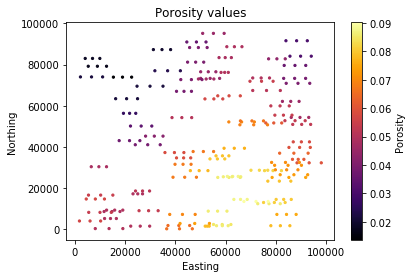

In [412]:
# More plotting
plt.scatter(WP['Middle Easting value'], WP['Northing'], s =5, c = WP['Average Porosity'], cmap = 'inferno')
plt.scatter(WP['Beginning Easting value'], WP['Northing'], s =5, c = WP["Average Porosity"], cmap = 'inferno')
plt.scatter(WP['Ending Easting value'], WP['Northing'], c = WP['Average Porosity'], cmap = 'inferno', s = 5)
plt.scatter
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.colorbar(label = "Porosity")
plt.title("Porosity values")

In [354]:
# Calculating error for our model.
X3_train, X3_test, y2_train, y2_test = train_test_split(X2, y1, test_size = 0.7, random_state = 0)
#X3_train = scaler.fit_transform(X_train)
#X3_test = scaler.fit_transform(X_test)
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 300,random_state=0)
RFR.fit(X3_train, y2_train)
y2_pred = RFR.predict(X3_test)
print("Mean Absolute Error:", metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print('Feature importances:', RFR.feature_importances_)
print('Training Score:', RFR.score(X3_train, y2_train))
print('Test Score:', RFR.score(X3_train, y2_train))

Mean Absolute Error: 948.0110952380951
Mean Squared Error: 1779646.9412144443
Root Mean Squared Error: 1334.0340854769956
Feature importances: [0.19298814 0.5495138  0.08269852 0.17479953]
Training Score: 0.865906623394542
Test Score: 0.865906623394542
